# EDA

In [1]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
def conexion_BBDD(nombre_BBDD, usuario, contraseña, anfitrion, puerto):

    conn = ps.connect(
                    dbname = nombre_BBDD, 
                    user = usuario,
                    password = contraseña,
                    host = anfitrion,
                    port = puerto)

    return conn

In [3]:
dbname = "BBDD_Hipica", # base a la que nos queremos conectar
user = "postgres",
password = "admin",
host = "localhost",
port = "5432" # puerto en el que s eencuentra postgres

In [4]:
conn = conexion_BBDD(dbname[0], user[0], password[0], host[0], port)
cur = conn.cursor()
# COmprobamos que la conexión está creada y conectada
cur.execute("SELECT version();")
cur.fetchone() 

('PostgreSQL 16.4, compiled by Visual C++ build 1940, 64-bit',)

## Análisis de concursos y pruebas

In [5]:
def ejecutor_querys(cur, query):
    cur.execute(query)
    return cur.fetchall()

In [6]:
query_concursos_completos = """
        SELECT *
        FROM concursos c;
"""
query_n_concursos = """
        SELECT COUNT(id_concurso)
        FROM concursos c;
"""
query_fechas_concursos = """
        SELECT 
                MIN(fecha_inicio_concurso),
                MAX(fecha_fin_concurso)
        FROM concursos c;
"""
query_concursos_mes = """
        SELECT 
                EXTRACT(MONTH FROM fecha_inicio_concurso),
                COUNT(id_concurso)
        FROM concursos c
        GROUP BY EXTRACT(MONTH FROM fecha_inicio_concurso)
        ORDER BY COUNT(id_concurso) DESC;
"""
query_concursos_ambito = """
        SELECT 
                ambito_concurso,
                CONCAT((COUNT(id_concurso)) * 100 / (SELECT COUNT(id_concurso) FROM concursos c), ' ', '%')
        FROM concursos c
        GROUP BY ambito_concurso
        ORDER BY COUNT(id_concurso) DESC;
"""
query_concursos_federacion = """
        SELECT 
                federacion_concurso,
                COUNT(id_concurso)
        FROM concursos c
        GROUP BY federacion_concurso
        ORDER BY COUNT(id_concurso) DESC;
"""
query_concursos_provincia = """
        SELECT 
                provincia_concurso,
                COUNT(id_concurso)
        FROM concursos c
        GROUP BY provincia_concurso
        ORDER BY COUNT(id_concurso) DESC;
"""

query_concursos_localidad = """
        SELECT 
                localidad_concurso,
                COUNT(id_concurso)
        FROM concursos c
        GROUP BY localidad_concurso
        ORDER BY COUNT(id_concurso) DESC;
"""

query_concursos_localidad = """
        SELECT 
                localidad_concurso,
                COUNT(id_concurso)
        FROM concursos c
        GROUP BY localidad_concurso
        ORDER BY COUNT(id_concurso) DESC;
"""
query_concursos_pruebas_concurso = """
        
        WITH pruebas_concurso AS (
                SELECT 
                        c.id_concurso,
                        COUNT(DISTINCT p.id_prueba) as n_pruebas_concurso
                FROM resultados r
                        JOIN concursos c ON r.id_concurso = c.id_concurso
                        JOIN pruebas p ON r.id_prueba = p.id_prueba
                GROUP BY c.id_concurso
        )
        SELECT 
                ROUND(AVG(n_pruebas_concurso), 0)
        FROM pruebas_concurso;

"""

query_pruebas = """
        
        SELECT 
                DISTINCT SUBSTRING(
                         nombre_prueba 
                         FROM POSITION('(2' IN nombre_prueba)
                         ) as tipo_prueba, 
                COUNT(id_prueba)
        FROM pruebas p
        GROUP BY tipo_prueba
        ORDER BY 2 DESC; 

"""
query_duracion_concursos = """
        
        SELECT 
                ROUND(AVG(fecha_fin_concurso::date - fecha_inicio_concurso::date), 0)
        FROM concursos c; 

"""

In [7]:
meses = {
    1: "enero",
    2: "febrero",
    3: "marzo",
    4: "abril",
    5: "mayo",
    6: "junio",
    7: "julio",
    8: "agosto",
    9: "septiembre",
    10: "octubre",
    11: "noviembre",
    12: "diciembre"
}
prueba_norma = {
    '(238.2.1)': 'Baremo A con cronómetro',
    '(238.2.2)': 'Baremo A con cronómetro y desempate',
    '(274.1.5.3)': 'Dos fases, ambas con cronómetro',
    '(274.2)': 'Dos fases especial',
    '(238.1.1)': 'Baremo A sin cronómetro',
    '(274.1.5.2)': 'Dos fases, primera sin cronómetro, segunda con cronómetro',
    '(269.3.2)': 'Prueba de potencia',
    '(263)': 'Baremo C',
    '(273.3.4)': 'Prueba con dos mangas y desempate',
    '(239)': 'Baremo A juzgado como Baremo C',
    '(264)': 'Prueba de caza',
    '(273.3.3.1)': 'Prueba con dos mangas sin desempate',
    '(276.2)': 'Prueba con puntuación progresiva',
    '(238.1.2)': 'Baremo A sin cronómetro con desempate'
}



In [8]:
conn.rollback()

In [9]:
tipos_pruebas = ejecutor_querys(cur, query_pruebas)
tipos_pruebas 

[('(238.2.1)', 450),
 ('(238.2.2)', 205),
 ('(274.1.5.3)', 198),
 ('(274.2)', 126),
 ('(238.1.1)', 87),
 ('(274.1.5.2)', 33),
 ('(269.3.2)', 15),
 ('(263)', 9),
 ('(273.3.4)', 9),
 ('(239)', 2),
 ('(264)', 2),
 ('(273.3.3.1)', 2),
 ('(276.2)', 2),
 ('(238.1.2)', 1)]

In [10]:
federaciones = ejecutor_querys(cur, query_concursos_federacion)

In [11]:
concursos_provincias = ejecutor_querys(cur, query_concursos_provincia)

In [12]:
localidades = ejecutor_querys(cur, query_concursos_localidad)

In [13]:
n_concursos = ejecutor_querys(cur, query_n_concursos)
fechas_concursos_25 = ejecutor_querys(cur, query_fechas_concursos)
n_concursos_mes = ejecutor_querys(cur, query_concursos_mes)
n_concursos_ambito= ejecutor_querys(cur, query_concursos_ambito)
media_pruebas_concurso = ejecutor_querys(cur, query_concursos_pruebas_concurso)
tipos_pruebas = ejecutor_querys(cur, query_pruebas)

print(f"""
      Se han celebrado un total de {n_concursos[0][0]} concursos, entre el {str(fechas_concursos_25[0][0])} y el {str(fechas_concursos_25[0][1])}. Un {n_concursos_ambito[0][1]} de los concursos han sido de 
      ámbito {str(n_concursos_ambito[0][0]).lower()}, frente a los de ámbito {str(n_concursos_ambito[1][0]).lower()}, que representan un {n_concursos_ambito[1][1]} del total. La duración media de los concursos 
      es de {int(ejecutor_querys(cur, query_duracion_concursos)[0][0])} días. 
      
      El mes que más concursos se han realizado ha sido {meses[int(n_concursos_mes[0][0])]}, con un total de {n_concursos_mes[0][1]} concursos, y el mes que menos concursos se han realizado ha sido el mes de {meses[int(n_concursos_mes[-1][0])]}, 
      con un total de {n_concursos_mes[-1][1]} concursos. La provincia en la que más concursos se han realizado ha sido {concursos_provincias[0][0]}, y la provincia en la que menos se han realizado ha sido {concursos_provincias[-1][0]}.
      
      De media en un concurso se realizan {str(media_pruebas_concurso[0][0]).replace('.', ',')} pruebas. Nos encontramos con {len(tipos_pruebas)} tipos de pruebas diferentes, siendo las más comunes las siguientes: 
      - {prueba_norma[tipos_pruebas[0][0]]}
      - {prueba_norma[tipos_pruebas[1][0]]}
      - {prueba_norma[tipos_pruebas[2][0]]}
      - {prueba_norma[tipos_pruebas[3][0]]}
      

      """)




      Se han celebrado un total de 122 concursos, entre el 2025-01-10 y el 2025-04-27. Un 73 % de los concursos han sido de 
      ámbito internacional, frente a los de ámbito nacional, que representan un 26 % del total. La duración media de los concursos 
      es de 3 días. 

      El mes que más concursos se han realizado ha sido febrero, con un total de 41 concursos, y el mes que menos concursos se han realizado ha sido el mes de abril, 
      con un total de 21 concursos. La provincia en la que más concursos se han realizado ha sido Valencia, y la provincia en la que menos se han realizado ha sido Córdoba.

      De media en un concurso se realizan 13 pruebas. Nos encontramos con 14 tipos de pruebas diferentes, siendo las más comunes las siguientes: 
      - Baremo A con cronómetro
      - Baremo A con cronómetro y desempate
      - Dos fases, ambas con cronómetro
      - Dos fases especial


      


In [14]:
concursos = pd.DataFrame(ejecutor_querys(cur, query_concursos_completos)).rename(columns = {0: "id_concurso", 1: "nombre_concurso", 2: "categoria_concurso", 3: "pais_concurso", 4: "provincia_concurso", 5: "localidad_concurso", 6: "ambito_concurso", 7: "federacion_concurso", 8: "fecha_inicio_concurso", 9: "fecha_fin_concurso"})
concursos.head()

,id_concurso,nombre_concurso,categoria_concurso,pais_concurso,provincia_concurso,localidad_concurso,ambito_concurso,federacion_concurso,fecha_inicio_concurso,fecha_fin_concurso
0,1,CSN3* Invierno,CSN***,Epaña,Sevilla,Real Club Pineda,Nacional,Federación Hípica Andaluza,2025-01-10,2025-01-12
1,2,SPRING MET I 2025 YH*,CSI YH*,Epaña,Valencia,Centro Ecuestre Oliva Nova,Internacional,Federación Hípica Comunidad Valenciana,2025-01-14,2025-01-16
2,3,MOURA TOURS VALENCIA - SPRING TOUR,CSI*,Epaña,Valencia,Moura Tours,Internacional,Federación Hípica Comunidad Valenciana,2025-01-20,2025-01-26
3,4,SPRING MET I 2025 - SILVER 1*,CSI*,Epaña,Valencia,Centro Ecuestre Oliva Nova,Internacional,Federación Hípica Comunidad Valenciana,2025-01-16,2025-01-18
4,5,SPRING MET I 2025 - GOLD 2*,CSI**,Epaña,Valencia,Centro Ecuestre Oliva Nova,Internacional,Federación Hípica Comunidad Valenciana,2025-01-16,2025-01-19


In [15]:
df = pd.DataFrame(n_concursos_ambito)
# Convert percentage strings to integers
df[1] = df[1].str.replace('%', '').str.strip().astype(int)
fig = px.pie(df, values=1, names=0, title = 'Porcentaje de concursos por ámbito')
fig.update_layout(width=800, height=500)
fig.show()

In [16]:
# Suponiendo que tu DataFrame se llama df
diccionario = concursos.groupby('provincia_concurso')['localidad_concurso'].unique().apply(list).to_dict()
diccionario

{'Asturias': ['Club Hipico Astur'],
 'Barcelona': ['Real Club De Polo De Barcelona', 'Open Sports Club'],
 'Cantabria': ['Heras Horses & Events'],
 'Cádiz': ['Dehesa Montenmedio'],
 'Córdoba': ['Palma Del Rio'],
 'Granada': ['Granada'],
 'Madrid': ['Club Hipico Las Cadenas',
  'R.A.C.E.',
  'Las Cadenas',
  'R.S.H.E.C.C.'],
 'Murcia': ['Club Aros'],
 'Segovia': ['Cenro Ecuestre De Castilla Y León'],
 'Sevilla': ['Real Club Pineda'],
 'Tenerife': ['C.H Nueva Atalaya', 'C.H. Del Sur Los Migueles'],
 'Valencia': ['Centro Ecuestre Oliva Nova',
  'Moura Tours',
  'Ceon',
  'Mouratours Valencia',
  'Mouratours'],
 'Zamora': ['Equus Duri']}

## Análisis de jinetes y caballos (binomios)

In [26]:
query_jinetes = """
        
        SELECT 
            DISTINCT COUNT(id_jinete)
        FROM jinetes j; 

"""
query_caballos = """
        
        SELECT 
            DISTINCT COUNT(id_caballo)
        FROM caballos c; 

"""

query_binomios = """

        SELECT 
            DISTINCT COUNT(CONCAT(j.id_jinete, '-', c.id_caballo))
        FROM resultados r
            JOIN jinetes j ON r.id_jinete = j.id_jinete
            JOIN caballos c ON r.id_caballo = c.id_caballo
"""

query_resultados_jinete = """

        SELECT 
            j.nombre_jinete,
            ROUND(AVG(r.puesto))
        FROM resultados r
            JOIN jinetes j ON r.id_jinete = j.id_jinete
            JOIN resultados_salto rs ON r.id_resultado = rs.id_resultado
        GROUP BY j.nombre_jinete
        ORDER BY 2 ASC;

"""
tipos_categorias = """
        SELECT 
            DISTINCT categoria_concurso
        FROM concursos c;
"""

query_resultados_jinete_2 = """
        SELECT 
            c.categoria_concurso,
            p.nombre_prueba

        FROM resultados r
        JOIN jinetes j ON r.id_jinete = j.id_jinete
        JOIN concursos c ON r.id_concurso = c.id_concurso
        JOIN resultados_salto rs ON r.id_resultado = rs.id_resultado
        JOIN pruebas p ON r.id_prueba = p.id_prueba
        GROUP BY c.categoria_concurso, p.nombre_prueba

        ;
"""



In [18]:
conn.rollback()

en cada tipo de prueba, que jinete es mejor/ al revés, y ver que jinete como overall es mejor y el mejor caballo, hacer un top 10. Ver si hay correlacion entre ganar y haber sido/mas rapido/tener mas o menos puntos en cada tipo de prueba. Dividir por categoría
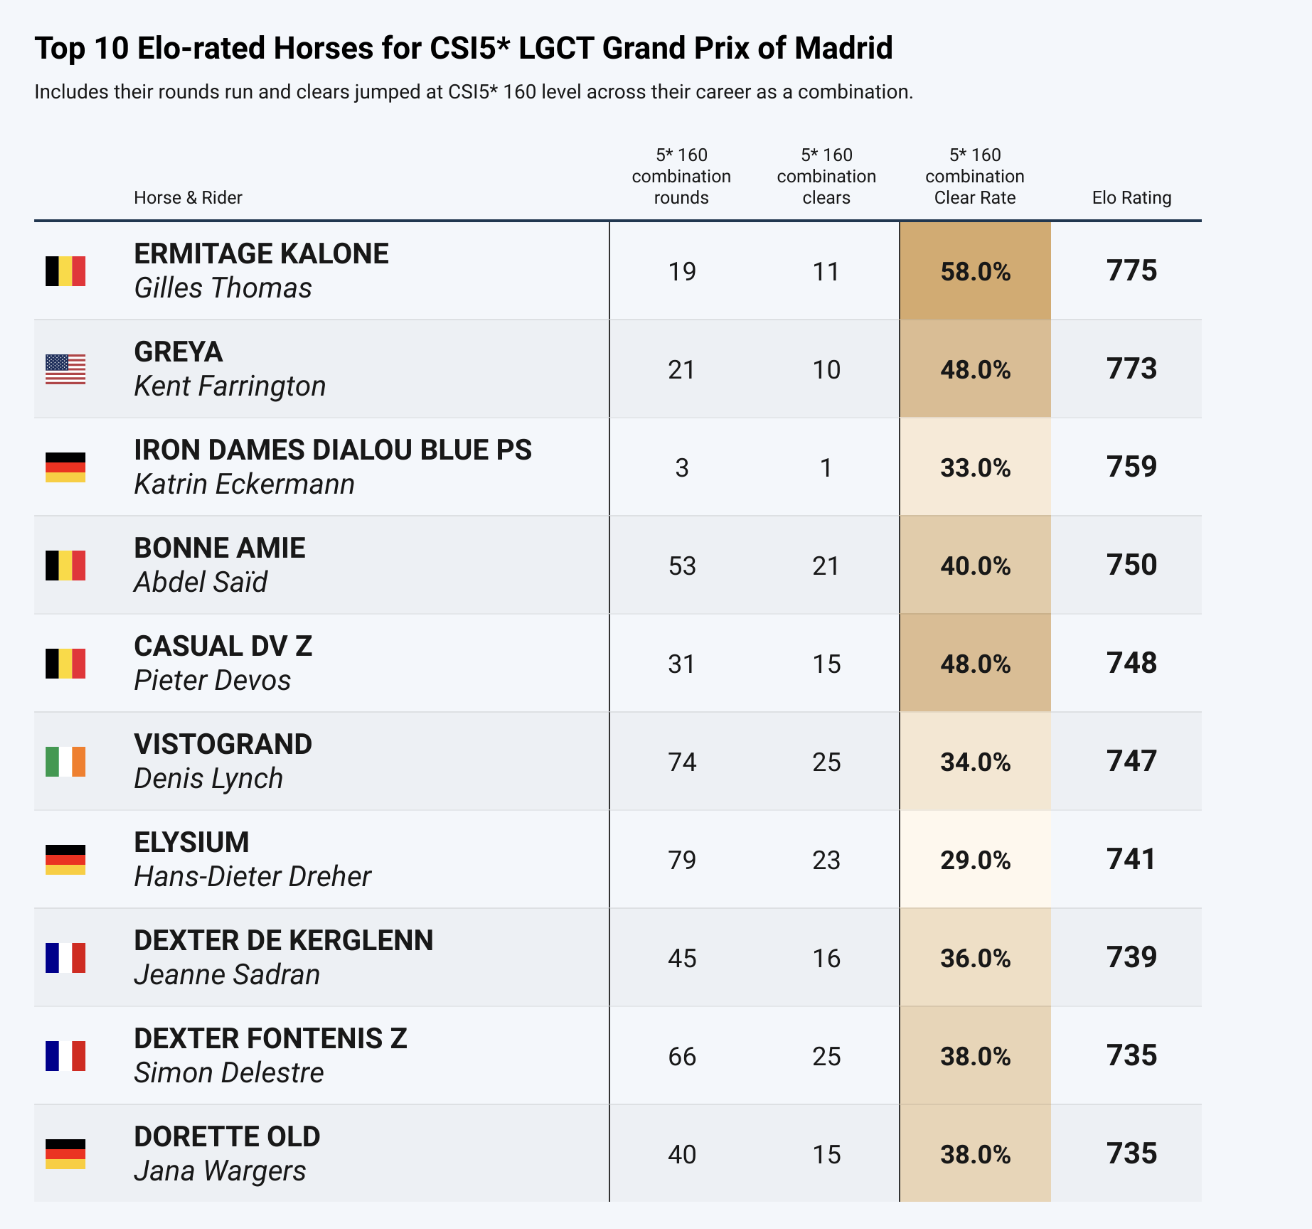

In [19]:
print(f"""
      Ha habido una participación de un total de {ejecutor_querys(cur, query_binomios)[0][0]} binomios en los concursos. A continuación realizamos un análisis de los binomios, en función
      de los resultados obtenidos en los concursos.
      """)


      Ha habido una participación de un total de 72680 binomios en los concursos. A continuación realizamos un análisis de los binomios, en función
      de los resultados obtenidos en los concursos.
      


In [20]:
pd.set_option('display.max_columns', None)

In [23]:
ejecutor_querys(cur, tipos_categorias)

[('CSIO Ch/J/Y',),
 ('CSI*',),
 ('CSN*****',),
 ('CSNCJ',),
 ('CSI YH*',),
 ('CSI**',),
 ('CSN***',),
 ('CSN**',),
 ('CSN*',),
 ('CSN****',),
 ('CSI****',),
 ('CSI***',)]

- CSNCJ:nacional caballos jovenes
- CSIO Ch/J/Y: internacional children, junior, young rider
- CSI YH: internacional young horse

## Dividimos entre categorías nacionales e internacionales

In [27]:
conn.rollback()

In [33]:
df = pd.DataFrame(ejecutor_querys(cur, query_resultados_jinete_2))
diccionario_agrupado = df.groupby(0)[1].apply(list).to_dict()

In [34]:
diccionario_agrupado

{'CSI YH*': ['5 años - 1,20 - A.c.c. y desempate (238.2.2)',
  '6 años - 1,30 - A c.c. (238.2.1)',
  '1,10 - A c.c. (238.2.1)',
  '1,35 (G) - Dos Fases (274.1.5.3)',
  '6 años - 1,20 - 2 fases Asc / Acc (274.1.5.2)',
  '5 años - 1,15 - A.c.c. y desempate (238.2.2)',
  '7 años - 1,30 - A c.c. (238.2.1)',
  '8 años - 1,45 - A.c.c y desempate (238.2.2)',
  '8 años - 1,45 - A.c.c. (238.2.1)',
  '6 años - 1,25 - Dos Fases Especial (274.2)',
  '1,40 (G) - Dos Fases (274.1.5.3)',
  '7 años - 1,25 - A c.c. (238.2.1)',
  '1,20 - A c.c. (238.2.1)',
  '7 años - 1,30 - Dos Fases (274.1.5.3)',
  '7 años - 1,35 - A sin cronómetro (238.1.1)',
  '5 años - 1,10 - Dos Fases (274.1.5.3)',
  '5 años - 1,15 - Dos Fases (274.1.5.3)',
  '6 años - 1,25 - A.c.c. y desempate (238.2.2)',
  '7 años - 1,35 - Dos Fases (274.1.5.3)',
  '1,20 - A.c.c. y desempate (238.2.2)',
  '7 años - 8 años - A.c.c (238.2.1)',
  '1,35 (G) - A.c.c. y desempate (238.2.2)',
  '8 años - 1,40 - A.c.c. (238.2.1)',
  '5 años - 1,05 - A s

## Análisis de resultados